In [1]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

'''
algorithm:
    0: 加权蒸馏 0.880
    1: 逐个蒸馏 0.850
    2: 服务器交换参数 0.825
    3: 服务器单独训练, 不使用公开数据 0.881
    4: 服务器单独训练，使用公开数据 0.872
model:
    1: CNN
    2: LeNet5
    3: ResNet18
'''

data = {}
algorithms = [0, 1, 2]
for algo in algorithms:
    file_path = f'./res/mnist_model_1_algo_0/alpha_0.5_T_6/server_commu_50_client_commu_5_client_train_5_batch_size_160_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
    data[algo] = torch.load(file_path, map_location='cpu')

legends = {0: 'algorithm 0', 1: 'algorithm 1', 2: 'algorithm 2', 3: 'algorithm 3', 4: 'algorithm 4'}

print(data.keys())

dict_keys([0, 1, 2])


0.3842211067676544 [0.3072361648082733, 0.3593969941139221, 0.3652261197566986, 0.37005025148391724, 0.37185928225517273, 0.3733668327331543, 0.37457287311553955, 0.3754773736000061, 0.3749748766422272, 0.3754773736000061, 0.37608039379119873, 0.37638190388679504, 0.37668341398239136, 0.37698492407798767, 0.3775879442691803, 0.3779899477958679, 0.3781909644603729, 0.3781909644603729, 0.37859296798706055, 0.37899497151374817, 0.37889447808265686, 0.3790954649448395, 0.3797989785671234, 0.3797989785671234, 0.3797989785671234, 0.3796984851360321, 0.3798995018005371, 0.3796984851360321, 0.3799999952316284, 0.3801004886627197, 0.3801004886627197, 0.38030150532722473, 0.38080400228500366, 0.38070350885391235, 0.38060301542282104, 0.38090452551841736, 0.38090452551841736, 0.38100501894950867, 0.38100501894950867, 0.3811055123806, 0.3811055123806, 0.38120603561401367, 0.38100501894950867, 0.3811055123806, 0.38120603561401367, 0.38120603561401367, 0.3814070224761963, 0.3814070224761963, 0.38130

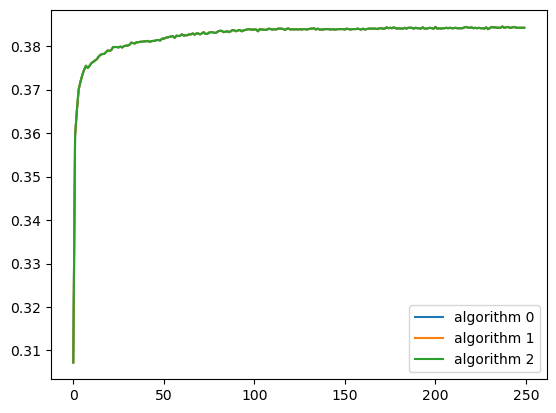

In [2]:
i = 2
for algo in algorithms:
    server_acc = data[algo]['server_acc']
    num_line = len(server_acc[0])
    x = numpy.arange(num_line)
    y = server_acc[i]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.325494130452474 [0.27728643019994104, 0.3111222783724467, 0.31631489594777423, 0.31745394070943195, 0.31916247804959613, 0.3200000027815501, 0.3206365207831065, 0.3211055199305216, 0.32103852430979407, 0.32123953104019165, 0.32157453894615173, 0.3218760391076406, 0.32201005021731055, 0.3221775492032369, 0.3226130704085032, 0.3227135638395945, 0.3230150739351908, 0.3230485816796621, 0.32324957847595215, 0.32331658403078717, 0.3234840929508209, 0.32335007190704346, 0.3238860865434011, 0.32385258873303735, 0.32388609647750854, 0.3239530920982361, 0.32408710320790607, 0.32405360539754235, 0.32408710320790607, 0.32422109444936115, 0.3243216077486674, 0.32428810000419617, 0.32462310791015625, 0.3246231178442637, 0.32465661565462745, 0.324857622385025, 0.32479061683019, 0.32492462793986004, 0.3249581257502238, 0.3249916235605876, 0.3250586191813151, 0.3250921269257864, 0.32502512137095135, 0.3250921169916789, 0.32525962591171265, 0.32525963584582007, 0.32539362708727515, 0.32536011934280396

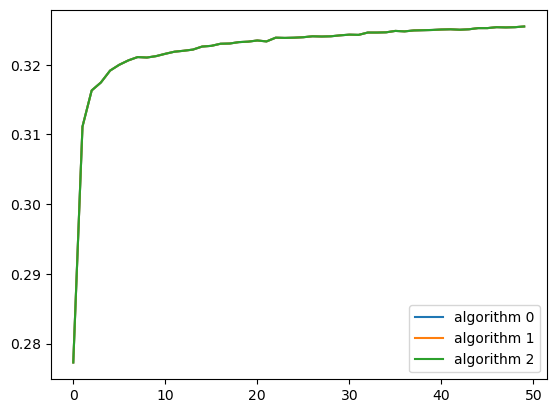

In [3]:
server_acc_mean = {}
num_line = len(data[algo]['server_acc'][0])
for algo in algorithms:
    server_acc_mean[algo] = numpy.zeros(num_line).tolist()
    for i in [0, 1, 2]:
        server_acc = data[algo]['server_acc']
        server_acc_mean[algo] += (numpy.array(server_acc[i]) / numpy.array(len(data[algo]['server_acc'])))
end_point = 50
x = numpy.arange(num_line)[:end_point]
for algo in algorithms:
    y = server_acc_mean[algo][:end_point]
    plt.plot(x, y, label=legends[algo])
    print(y[-1], list(y))
plt.legend()
plt.show()

0.31216078996658325 [0.19778893887996674, 0.29326632618904114, 0.2696482241153717, 0.2429145723581314, 0.29125627875328064, 0.29547739028930664, 0.29909548163414, 0.3010050356388092, 0.30351758003234863, 0.3048241138458252, 0.3085426986217499, 0.3090452253818512, 0.30994975566864014, 0.31005024909973145, 0.31035175919532776, 0.3090452253818512, 0.3108542561531067, 0.30753767490386963, 0.3106532692909241, 0.3066331744194031, 0.3107537627220154, 0.30793970823287964, 0.3110552728176117, 0.31035175919532776, 0.3106532692909241, 0.3107537627220154, 0.3109547793865204, 0.3109547793865204, 0.3114572763442993, 0.3114572763442993, 0.3114572763442993, 0.3114572763442993, 0.3114572763442993, 0.3114572763442993, 0.3114572763442993, 0.3116582930088043, 0.3114572763442993, 0.311356782913208, 0.31175878643989563, 0.311155766248703, 0.311155766248703, 0.311155766248703, 0.311155766248703, 0.311155766248703, 0.311155766248703, 0.3116582930088043, 0.3114572763442993, 0.3114572763442993, 0.31185927987098

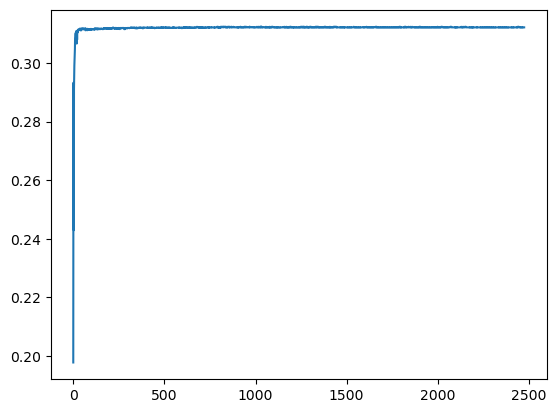

In [4]:
client_acc = data[0]['client_acc']
num_line = len(client_acc[0])
x = numpy.arange(num_line)
i = 0
y = client_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

3.589509963989258 [2.284759044647217, 2.2767367362976074, 2.2563376426696777, 2.24302339553833, 2.2285656929016113, 2.208265542984009, 2.187998056411743, 2.17668080329895, 2.148301124572754, 2.122645854949951, 2.105560064315796, 2.0595734119415283, 2.0296406745910645, 1.9750534296035767, 1.957502007484436, 1.9203929901123047, 1.8768905401229858, 1.861108422279358, 1.8050787448883057, 1.7511041164398193, 1.6895790100097656, 1.704909324645996, 1.6193748712539673, 1.542621374130249, 1.5575668811798096, 1.5046684741973877, 1.458873987197876, 1.421226978302002, 1.3744258880615234, 1.3755109310150146, 1.3469992876052856, 1.2874760627746582, 1.2923985719680786, 1.2395751476287842, 1.2567814588546753, 1.1765072345733643, 1.2028398513793945, 1.1632423400878906, 1.1179749965667725, 1.1032869815826416, 1.0750246047973633, 1.083200454711914, 1.0231189727783203, 0.9728857278823853, 0.9903570413589478, 0.9703536033630371, 0.902642548084259, 0.8365520238876343, 0.9762849807739258, 0.7911640405654907,

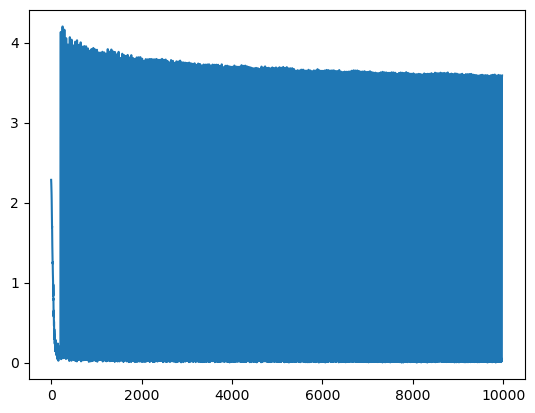

In [5]:
client_loss = data[0]['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
i = 6
y = client_loss[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()

[[0.625, 0.9149999618530273, 0.824999988079071, 0.75, 0.9099999666213989, 0.9399999976158142, 0.9449999928474426, 0.949999988079071, 0.9599999785423279, 0.9599999785423279, 0.9699999690055847, 0.9749999642372131, 0.9749999642372131, 0.9749999642372131, 0.9799999594688416, 0.9699999690055847, 0.9799999594688416, 0.9599999785423279, 0.9799999594688416, 0.9749999642372131, 0.9749999642372131, 0.9749999642372131, 0.9799999594688416, 0.9799999594688416, 0.9899999499320984, 0.9799999594688416, 0.98499995470047, 0.9799999594688416, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0.98499995470047, 0

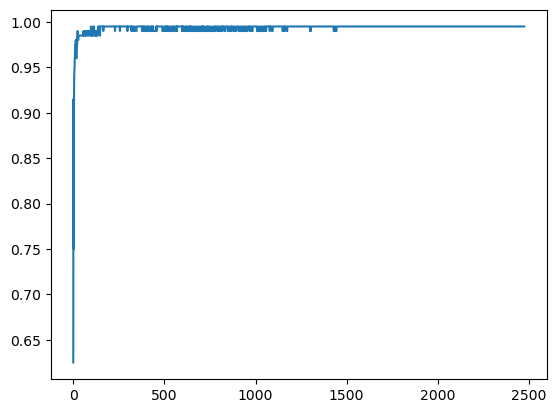

In [6]:
train_acc = data[0]['validate_acc']
print(train_acc)
num_line = len(train_acc[0])
x = numpy.arange(num_line)
i = 0
y = train_acc[i]
plt.plot(x, y)
print(y[-1], list(y))
plt.show()